In [0]:
import urllib.request
import zipfile
import os
import shutil

zipFileName = "euclid_psfs.tar.gz"
urllib.request.urlretrieve("http://www.cosmostat.org/wp-content/uploads/2017/04/euclid_psfs.tar.gz", zipFileName)
zipFileName = "galaxy_images.tar.gz"
urllib.request.urlretrieve("http://www.cosmostat.org/wp-content/uploads/2017/05/galaxy_images.tar.gz", zipFileName)

('galaxy_images.tar.gz', <http.client.HTTPMessage at 0x7f28dc8c6898>)

In [0]:
!tar -xvf euclid_psfs.tar.gz
!tar -xvf galaxy_images.tar.gz
!pip install modopt

euclid_psf_pos.fits
euclid_psf_pos.npy
euclid_psfs.fits
euclid_psfs.npy
./._readme.txt
readme.txt
galaxy_cube_10000.fits
galaxy_cube_10000.npy
./._readme.txt
readme.txt
  Stored in directory: /root/.cache/pip/wheels/65/32/cc/c7aad1d939b0dc6e187caa0ce44349527c103d39f2120126ce
Successfully built modopt


In [0]:
import numpy as np
from modopt.math.convolve import convolve

np.random.seed(142)

imageCount = 500
maxPSFs = 1

X = np.load("galaxy_cube_10000.npy")
PSFs = np.load("euclid_psfs.npy")
images = np.zeros((imageCount, X.shape[1], X.shape[2]))
imagesPSFs = np.zeros((imageCount, maxPSFs, X.shape[1], X.shape[2]))
imagesIndeces = []
i = 0

def normalize(image):
  return (image - np.min(image)) / (np.max(image) - np.min(image))

def add_gaussian_noise(image):
  SNR = 2e-2
  noise = np.random.normal(scale=SNR, size=image.shape)
  noisy_img = image + noise
  return noisy_img

while(True):
  PSFCount = np.random.randint(1, maxPSFs + 1)
  PSFIndeces = []
  imageIndex = np.random.randint(0, len(X))
  
  if(imageIndex in imagesIndeces):
    continue
  
  imagesIndeces.append(imageIndex)
  image = normalize(X[imageIndex])
  
  j = 0
  
  while(True):
    PSFIndex = np.random.randint(0, len(PSFs))
    
    if(PSFIndex in PSFIndeces):
      continue
    
    PSF = PSFs[PSFIndex]
    PSFIndeces.append(PSFIndex)
    image = convolve(image, PSF)
    imagesPSFs[i][j] = PSF
    j += 1
    
    if(j == PSFCount):
      break
  
  
  images[i] = add_gaussian_noise(image)
  i += 1
  
  if(i == imageCount):
    break
imagesPSFs = np.squeeze(imagesPSFs)
np.save("images.npy", images)
np.save("imagesPSFs.npy", imagesPSFs)

 - ITERATION: 1
 - Min (X): -0.01926926165869529


N/A% (0 of 150) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

 - COST: 806.9389088889516



N/A% (0 of 150) |                        | Elapsed Time: 0:00:01 ETA:  --:--:--

 - ITERATION: 2


N/A% (0 of 150) |                        | Elapsed Time: 0:00:01 ETA:  --:--:--

 - Min (X): -0.003853852331739057


N/A% (0 of 150) |                        | Elapsed Time: 0:00:02 ETA:  --:--:--

 - COST: 829.8125352164113


  0% (1 of 150) |                        | Elapsed Time: 0:00:03 ETA:   0:05:36


 - ITERATION: 3


  0% (1 of 150) |                        | Elapsed Time: 0:00:03 ETA:   0:05:35

 - Min (X): -0.0007707704663478112


  0% (1 of 150) |                        | Elapsed Time: 0:00:04 ETA:   0:05:35

 - COST: 701.4741602810011


  1% (2 of 150) |                        | Elapsed Time: 0:00:05 ETA:   0:05:25


 - ITERATION: 4


  1% (2 of 150) |                        | Elapsed Time: 0:00:06 ETA:   0:05:25

 - Min (X): -0.0001541540932695622


  1% (2 of 150) |                        | Elapsed Time: 0:00:06 ETA:   0:05:27

 - COST: 598.2437894490236


  2% (3 of 150) |                        | Elapsed Time: 0:00:08 ETA:   0:05:22


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.2593127950916938

 - ITERATION: 5


  2% (3 of 150) |                        | Elapsed Time: 0:00:08 ETA:   0:05:24

 - Min (X): -3.0830818653912436e-05


  2% (3 of 150) |                        | Elapsed Time: 0:00:08 ETA:   0:05:25

 - COST: 542.5120888163323


  2% (4 of 150) |                        | Elapsed Time: 0:00:10 ETA:   0:05:25


 - ITERATION: 6


  2% (4 of 150) |                        | Elapsed Time: 0:00:10 ETA:   0:05:25

 - Min (X): -6.1661637307824855e-06


  2% (4 of 150) |                        | Elapsed Time: 0:00:11 ETA:   0:05:23

 - COST: 510.9519608612239


  3% (5 of 150) |                        | Elapsed Time: 0:00:12 ETA:   0:05:16


 - ITERATION: 7


  3% (5 of 150) |                        | Elapsed Time: 0:00:12 ETA:   0:05:16

 - Min (X): -1.2332327461564968e-06


  3% (5 of 150) |                        | Elapsed Time: 0:00:13 ETA:   0:05:16

 - COST: 488.366882482507


  4% (6 of 150) |                        | Elapsed Time: 0:00:14 ETA:   0:05:18


 - ITERATION: 8


  4% (6 of 150) |                        | Elapsed Time: 0:00:15 ETA:   0:05:18

 - Min (X): -2.466465492312993e-07


  4% (6 of 150) |                        | Elapsed Time: 0:00:15 ETA:   0:05:17

 - COST: 468.7655088932088


  4% (7 of 150) |#                       | Elapsed Time: 0:00:16 ETA:   0:05:11


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.10064611663949642

 - ITERATION: 9


  4% (7 of 150) |#                       | Elapsed Time: 0:00:17 ETA:   0:05:10

 - Min (X): -4.932930984625985e-08


  4% (7 of 150) |#                       | Elapsed Time: 0:00:17 ETA:   0:05:10

 - COST: 451.3997360136251


  5% (8 of 150) |#                       | Elapsed Time: 0:00:19 ETA:   0:05:09


 - ITERATION: 10


  5% (8 of 150) |#                       | Elapsed Time: 0:00:19 ETA:   0:05:11

 - Min (X): -9.865861969251967e-09


  5% (8 of 150) |#                       | Elapsed Time: 0:00:19 ETA:   0:05:12

 - COST: 436.94992992800707


  6% (9 of 150) |#                       | Elapsed Time: 0:00:21 ETA:   0:05:07


 - ITERATION: 11


  6% (9 of 150) |#                       | Elapsed Time: 0:00:21 ETA:   0:05:07

 - Min (X): -1.9731723938503932e-09


  6% (9 of 150) |#                       | Elapsed Time: 0:00:22 ETA:   0:05:06

 - COST: 426.9791860953668


  6% (10 of 150) |#                      | Elapsed Time: 0:00:23 ETA:   0:05:02


 - ITERATION: 12


  6% (10 of 150) |#                      | Elapsed Time: 0:00:23 ETA:   0:05:03

 - Min (X): -3.9463447877007855e-10


  6% (10 of 150) |#                      | Elapsed Time: 0:00:24 ETA:   0:05:07

 - COST: 421.8814970089204


  7% (11 of 150) |#                      | Elapsed Time: 0:00:25 ETA:   0:05:01


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.04651998098549402

 - ITERATION: 13


  7% (11 of 150) |#                      | Elapsed Time: 0:00:25 ETA:   0:05:00

 - Min (X): -7.892689575401569e-11


  7% (11 of 150) |#                      | Elapsed Time: 0:00:26 ETA:   0:04:58

 - COST: 419.48403928253805


  8% (12 of 150) |#                      | Elapsed Time: 0:00:27 ETA:   0:04:57


 - ITERATION: 14


  8% (12 of 150) |#                      | Elapsed Time: 0:00:28 ETA:   0:04:57

 - Min (X): -1.5785379150803135e-11


  8% (12 of 150) |#                      | Elapsed Time: 0:00:28 ETA:   0:04:55

 - COST: 417.8017134840079


  8% (13 of 150) |#                      | Elapsed Time: 0:00:29 ETA:   0:05:02


 - ITERATION: 15


  8% (13 of 150) |#                      | Elapsed Time: 0:00:30 ETA:   0:05:08

 - Min (X): -3.1570758301606265e-12


  8% (13 of 150) |#                      | Elapsed Time: 0:00:30 ETA:   0:05:17

 - COST: 415.82538794659433


  9% (14 of 150) |##                     | Elapsed Time: 0:00:32 ETA:   0:04:42


 - ITERATION: 16


  9% (14 of 150) |##                     | Elapsed Time: 0:00:32 ETA:   0:05:31

 - Min (X): -6.314151660321251e-13


  9% (14 of 150) |##                     | Elapsed Time: 0:00:33 ETA:   0:05:33

 - COST: 413.5939222595398


 10% (15 of 150) |##                     | Elapsed Time: 0:00:34 ETA:   0:04:42


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.009484277088336478

 - ITERATION: 17


 10% (15 of 150) |##                     | Elapsed Time: 0:00:35 ETA:   0:05:31

 - Min (X): -1.26283033206425e-13


 10% (15 of 150) |##                     | Elapsed Time: 0:00:35 ETA:   0:05:29

 - COST: 411.30105031520117


 10% (16 of 150) |##                     | Elapsed Time: 0:00:37 ETA:   0:04:36


 - ITERATION: 18


 10% (16 of 150) |##                     | Elapsed Time: 0:00:37 ETA:   0:05:25

 - Min (X): -2.5256606641284994e-14


 10% (16 of 150) |##                     | Elapsed Time: 0:00:38 ETA:   0:05:26

 - COST: 409.21549870341994


 11% (17 of 150) |##                     | Elapsed Time: 0:00:39 ETA:   0:04:35


 - ITERATION: 19


 11% (17 of 150) |##                     | Elapsed Time: 0:00:40 ETA:   0:05:18

 - Min (X): -5.0513213282569976e-15


 11% (17 of 150) |##                     | Elapsed Time: 0:00:40 ETA:   0:05:11

 - COST: 407.60618412531954


 12% (18 of 150) |##                     | Elapsed Time: 0:00:41 ETA:   0:04:44


 - ITERATION: 20


 12% (18 of 150) |##                     | Elapsed Time: 0:00:42 ETA:   0:04:43

 - Min (X): -1.0102642656513993e-15


 12% (18 of 150) |##                     | Elapsed Time: 0:00:42 ETA:   0:04:43

 - COST: 406.55278639115943


 12% (19 of 150) |##                     | Elapsed Time: 0:00:44 ETA:   0:04:41


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.007808767983123821

 - ITERATION: 21


 12% (19 of 150) |##                     | Elapsed Time: 0:00:44 ETA:   0:04:43

 - Min (X): -2.0205285313027982e-16


 12% (19 of 150) |##                     | Elapsed Time: 0:00:44 ETA:   0:04:41

 - COST: 405.95086871977264


 13% (20 of 150) |###                    | Elapsed Time: 0:00:46 ETA:   0:04:39


 - ITERATION: 22


 13% (20 of 150) |###                    | Elapsed Time: 0:00:46 ETA:   0:04:39

 - Min (X): -4.0410570626055954e-17


 13% (20 of 150) |###                    | Elapsed Time: 0:00:46 ETA:   0:04:39

 - COST: 405.3875355591812


 14% (21 of 150) |###                    | Elapsed Time: 0:00:48 ETA:   0:04:36


 - ITERATION: 23


 14% (21 of 150) |###                    | Elapsed Time: 0:00:48 ETA:   0:04:37

 - Min (X): -8.08211412521119e-18


 14% (21 of 150) |###                    | Elapsed Time: 0:00:49 ETA:   0:04:37

 - COST: 404.70465976409264


 14% (22 of 150) |###                    | Elapsed Time: 0:00:50 ETA:   0:04:37


 - ITERATION: 24


 14% (22 of 150) |###                    | Elapsed Time: 0:00:50 ETA:   0:04:37

 - Min (X): -1.6164228250422375e-18


 14% (22 of 150) |###                    | Elapsed Time: 0:00:51 ETA:   0:04:36

 - COST: 404.1445600997865


 15% (23 of 150) |###                    | Elapsed Time: 0:00:52 ETA:   0:04:30


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.003077439347093084

 - ITERATION: 25


 15% (23 of 150) |###                    | Elapsed Time: 0:00:52 ETA:   0:04:29

 - Min (X): -3.232845650084474e-19


 15% (23 of 150) |###                    | Elapsed Time: 0:00:53 ETA:   0:04:28

 - COST: 403.418746737939


 16% (24 of 150) |###                    | Elapsed Time: 0:00:54 ETA:   0:04:29


 - ITERATION: 26


 16% (24 of 150) |###                    | Elapsed Time: 0:00:55 ETA:   0:04:28

 - Min (X): -6.465691300168947e-20


 16% (24 of 150) |###                    | Elapsed Time: 0:00:55 ETA:   0:04:33

 - COST: 402.71500532776145


 16% (25 of 150) |###                    | Elapsed Time: 0:00:56 ETA:   0:04:29


 - ITERATION: 27


 16% (25 of 150) |###                    | Elapsed Time: 0:00:57 ETA:   0:04:30

 - Min (X): -1.293138260033789e-20


 16% (25 of 150) |###                    | Elapsed Time: 0:00:57 ETA:   0:04:26

 - COST: 402.21725165309635


 17% (26 of 150) |###                    | Elapsed Time: 0:00:59 ETA:   0:04:24


 - ITERATION: 28


 17% (26 of 150) |###                    | Elapsed Time: 0:00:59 ETA:   0:04:23

 - Min (X): -2.5862765200675777e-21


 17% (26 of 150) |###                    | Elapsed Time: 0:00:59 ETA:   0:04:23

 - COST: 401.8172760666786


 18% (27 of 150) |####                   | Elapsed Time: 0:01:01 ETA:   0:04:21


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0026108634312992994

 - ITERATION: 29


 18% (27 of 150) |####                   | Elapsed Time: 0:01:01 ETA:   0:04:21

 - Min (X): -5.172553040135155e-22


 18% (27 of 150) |####                   | Elapsed Time: 0:01:01 ETA:   0:04:22

 - COST: 401.41386712540657


 18% (28 of 150) |####                   | Elapsed Time: 0:01:03 ETA:   0:04:39


 - ITERATION: 30


 18% (28 of 150) |####                   | Elapsed Time: 0:01:03 ETA:   0:04:45

 - Min (X): -1.0345106080270307e-22


 18% (28 of 150) |####                   | Elapsed Time: 0:01:04 ETA:   0:04:49

 - COST: 400.95965669221175


 19% (29 of 150) |####                   | Elapsed Time: 0:01:05 ETA:   0:04:06


 - ITERATION: 31


 19% (29 of 150) |####                   | Elapsed Time: 0:01:06 ETA:   0:04:50

 - Min (X): -2.0690212160540608e-23


 19% (29 of 150) |####                   | Elapsed Time: 0:01:06 ETA:   0:04:50

 - COST: 400.6216218589327


 20% (30 of 150) |####                   | Elapsed Time: 0:01:08 ETA:   0:04:00


 - ITERATION: 32


 20% (30 of 150) |####                   | Elapsed Time: 0:01:08 ETA:   0:04:42

 - Min (X): -4.13804243210812e-24


 20% (30 of 150) |####                   | Elapsed Time: 0:01:09 ETA:   0:04:43

 - COST: 400.191688642208


 20% (31 of 150) |####                   | Elapsed Time: 0:01:10 ETA:   0:04:00


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0019482859438253817

 - ITERATION: 33


 20% (31 of 150) |####                   | Elapsed Time: 0:01:10 ETA:   0:04:42

 - Min (X): -8.27608486421624e-25


 20% (31 of 150) |####                   | Elapsed Time: 0:01:11 ETA:   0:04:41

 - COST: 399.77044130429306


 21% (32 of 150) |####                   | Elapsed Time: 0:01:12 ETA:   0:04:28


 - ITERATION: 34


 21% (32 of 150) |####                   | Elapsed Time: 0:01:13 ETA:   0:04:23

 - Min (X): -1.6552169728432476e-25


 21% (32 of 150) |####                   | Elapsed Time: 0:01:13 ETA:   0:04:17

 - COST: 399.50677616468306


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:14 ETA:   0:04:08


 - ITERATION: 35


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:15 ETA:   0:04:07

 - Min (X): -3.310433945686495e-26


 22% (33 of 150) |#####                  | Elapsed Time: 0:01:15 ETA:   0:04:07

 - COST: 399.1505617767816


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:17 ETA:   0:04:06


 - ITERATION: 36


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:17 ETA:   0:04:06

 - Min (X): -6.620867891372988e-27


 22% (34 of 150) |#####                  | Elapsed Time: 0:01:17 ETA:   0:04:07

 - COST: 398.98036048865106


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:19 ETA:   0:04:03


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0014362245235277635

 - ITERATION: 37


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:19 ETA:   0:04:04

 - Min (X): -1.3241735782745973e-27


 23% (35 of 150) |#####                  | Elapsed Time: 0:01:20 ETA:   0:04:03

 - COST: 398.7198137407155


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:21 ETA:   0:04:03


 - ITERATION: 38


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:21 ETA:   0:04:03

 - Min (X): -2.648347156549194e-28


 24% (36 of 150) |#####                  | Elapsed Time: 0:01:22 ETA:   0:04:04

 - COST: 398.43911131282096


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:23 ETA:   0:03:57


 - ITERATION: 39


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:23 ETA:   0:03:57

 - Min (X): -5.296694313098388e-29


 24% (37 of 150) |#####                  | Elapsed Time: 0:01:24 ETA:   0:03:58

 - COST: 398.2279074288945


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:25 ETA:   0:03:56


 - ITERATION: 40


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:25 ETA:   0:03:56

 - Min (X): -1.0593388626196773e-29


 25% (38 of 150) |#####                  | Elapsed Time: 0:01:26 ETA:   0:04:00

 - COST: 398.0851070964966


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:27 ETA:   0:03:58


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.00106228394201188

 - ITERATION: 41


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:28 ETA:   0:03:58

 - Min (X): -2.118677725239354e-30


 26% (39 of 150) |#####                  | Elapsed Time: 0:01:28 ETA:   0:03:53

 - COST: 397.87563236224025


 26% (40 of 150) |######                 | Elapsed Time: 0:01:29 ETA:   0:03:56


 - ITERATION: 42


 26% (40 of 150) |######                 | Elapsed Time: 0:01:30 ETA:   0:03:56

 - Min (X): -4.237355450478707e-31


 26% (40 of 150) |######                 | Elapsed Time: 0:01:30 ETA:   0:03:57

 - COST: 397.8227388788348


 27% (41 of 150) |######                 | Elapsed Time: 0:01:31 ETA:   0:03:52


 - ITERATION: 43


 27% (41 of 150) |######                 | Elapsed Time: 0:01:32 ETA:   0:03:52

 - Min (X): -8.474710900957412e-32


 27% (41 of 150) |######                 | Elapsed Time: 0:01:32 ETA:   0:03:52

 - COST: 397.68592174867695


 28% (42 of 150) |######                 | Elapsed Time: 0:01:34 ETA:   0:03:48


 - ITERATION: 44


 28% (42 of 150) |######                 | Elapsed Time: 0:01:34 ETA:   0:03:49

 - Min (X): -1.694942180191482e-32


 28% (42 of 150) |######                 | Elapsed Time: 0:01:34 ETA:   0:03:48

 - COST: 397.6146976843993


 28% (43 of 150) |######                 | Elapsed Time: 0:01:36 ETA:   0:03:45


 - CONVERGENCE TEST - 
 - CHANGE IN COST: 0.0005001276225364316

 - ITERATION: 45


 28% (43 of 150) |######                 | Elapsed Time: 0:01:36 ETA:   0:03:46

 - Min (X): -3.389884360382963e-33


 28% (43 of 150) |######                 | Elapsed Time: 0:01:37 ETA:   0:03:46

 - COST: 397.5587813251062


 29% (44 of 150) |######                 | Elapsed Time: 0:01:38 ETA:   0:03:45


 - ITERATION: 46


 29% (44 of 150) |######                 | Elapsed Time: 0:01:38 ETA:   0:03:43

 - Min (X): -6.779768720765925e-34


 29% (44 of 150) |######                 | Elapsed Time: 0:01:39 ETA:   0:03:43

 - COST: 397.6336275881098


 30% (45 of 150) |######                 | Elapsed Time: 0:01:40 ETA:   0:03:43


 - ITERATION: 47


 30% (45 of 150) |######                 | Elapsed Time: 0:01:40 ETA:   0:03:42

 - Min (X): -1.3559537441531846e-34


 30% (45 of 150) |######                 | Elapsed Time: 0:01:41 ETA:   0:03:42

 - COST: 397.5723240580977


 30% (46 of 150) |#######                | Elapsed Time: 0:01:42 ETA:   0:03:40


 - ITERATION: 48


 30% (46 of 150) |#######                | Elapsed Time: 0:01:42 ETA:   0:03:42

 - Min (X): -2.7119074883063683e-35


100% (150 of 150) |######################| Elapsed Time: 0:01:43 Time:  0:01:43


 - COST: 397.571497071855

 - CONVERGENCE TEST - 
 - CHANGE IN COST: 6.110565406176274e-05

 - Converged!


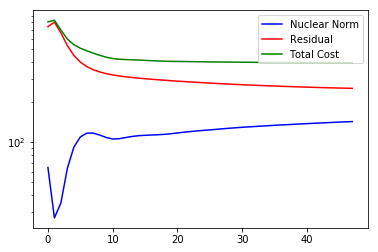

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from modopt.opt.cost import costObj
from modopt.math.convolve import convolve
from modopt.math.stats import sigma_mad
from modopt.opt.algorithms import Condat
from modopt.opt.proximity import Positivity, LowRankMatrix
from modopt.opt.linear import Identity
from modopt.math.matrix import PowerMethod
from modopt.math.convolve import convolve
from modopt.opt.gradient import GradParent
from modopt.base.np_adjust import rotate

def psf_convolve(data, psf):
  """Convolve data with PSF
  This method convolves an image with a PSF

  Parameters
  ----------
  data : np.ndarray
    Input data array, normally an array of 2D images
  psf : np.ndarray
    Input PSF array, normally either a single 2D PSF or an array of 2DPSFs
  Returns 
  -------
  np.ndarray convolved data
  """     
  return np.array([convolve(i, j) for i, j in zip(data, psf)])

class GradKnownPSF(GradParent, PowerMethod):
  """Gradient class for PSF convolution
  This class defines the operators for a fixed or object variant PSF

  Parameters
  ----------
  data : np.ndarray
    Input data array, an array of 2D observed images (e.g. with noise)
  psf : np.ndarray
    PSF, a single 2D PSF or an array of 2D PSFs

  Notes
  -----
  The properties of `PowerMethod` are inherited in this class
  """

  def __init__(self, data, psf):
    self._grad_data_type = np.floating
    self.obs_data = data
    self.op = self._H_op_method
    self.trans_op = self._Ht_op_method
    self._psf = psf
    self.get_grad = self._get_grad_method
    self.cost = self._cost_method
    self.costHistory = []
    PowerMethod.__init__(self, self.trans_op_op, self.obs_data.shape)

  def _H_op_method(self, x):
    """H matrix operation
    This method calculates the action of the matrix H on the input data, in
    this case the convolution of the the input data with the PSF

    Parameters
    ----------
    x : np.ndarray
      Input data array, an array of recovered 2D images

    Returns
    -------
    np.ndarray result
    """
    return psf_convolve(x, self._psf)

  def _Ht_op_method(self, x):
    """Ht matrix operation

    This method calculates the action of the transpose of the matrix H on
    the input data, in this case the convolution of the the input data with
    the rotated PSF

    Parameters
    ----------
    x : np.ndarray
      Input data array, an array of recovered 2D images

    Returns
    -------
    np.ndarray result

    """

    return psf_convolve(x, rotate(self._psf))

  def _calc_grad(self, x):
    return self.trans_op(self.op(x) - self.obs_data)

  def _get_grad_method(self, x):
    """Get the gradient at the given iteration
    This method calculates the gradient value from the input data

    Parameters
    ----------
    x : np.ndarray
      Input data array, an array of recovered 2D images

    """

    self.grad = self._calc_grad(x)

  def _cost_method(self, *args, **kwargs):
    """Calculate gradient component of the cost
    This method returns the L2 norm error of the difference between the
    original data and the data obtained after optimisation

    Returns
    -------
    float gradient cost component

    """
    cost = 0.5 * np.linalg.norm(self.obs_data - self.op(args[0])) ** 2
    self.costHistory.append(cost)
    return cost

class customLowRankMatrix(LowRankMatrix):
  def __init__(self, lmda, thresh_type, operator):
    self.costHistory = []
    LowRankMatrix.__init__(self, lmda, thresh_type=thresh_type, operator=operator)
  
  def _cost_method(self, *args, **kwargs):
    kwargs['verbose'] = False
    cost = LowRankMatrix._cost_method(self, *args, **kwargs)
    self.costHistory.append(cost)
    return cost

Y = images
psfs = imagesPSFs
#Y = np.array([add_gaussian_noise(convolve(normalize(Y[i]), psfs[i])) for i in range(len(Y))])
#Y = np.load("example_image_stack.npy")
#psfs = np.load("example_psfs.npy")
alpha = 1
sigma=sigma_mad(Y)
grad = GradKnownPSF(Y, psfs)
spec_rad = grad.spec_rad
lmda = alpha * sigma * np.sqrt(np.max([Y.shape[0] + 1, Y.shape[1] * Y.shape[2]])) * spec_rad
prox = Positivity()
lowRank = customLowRankMatrix(lmda, thresh_type="hard", operator=grad.trans_op)
cost = costObj([grad, prox, lowRank])
condat = Condat(Y, np.ones(Y.shape), grad, prox, lowRank, linear=Identity(), cost=cost, sigma=0.5, tau=0.5, rho=0.8)
np.save("text.npy", condat.x_final)

plt.semilogy(lowRank.costHistory, color="blue", label="Nuclear Norm")
plt.semilogy(grad.costHistory, color="red", label="Residual")
plt.semilogy(np.array(grad.costHistory) + np.array(lowRank.costHistory), color="Green", label="Total Cost")
plt.xscale('log')
plt.legend(loc='upper right')
plt.savefig("Plot.png")
plt.show()

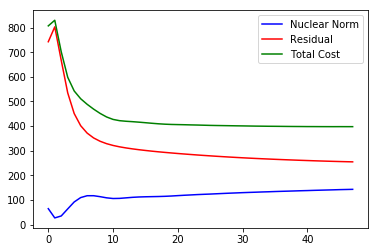

In [0]:
plt.plot(lowRank.costHistory, color="blue", label="Nuclear Norm")
plt.plot(grad.costHistory, color="red", label="Residual")
plt.plot(np.array(grad.costHistory) + np.array(lowRank.costHistory), color="Green", label="Total Cost")
plt.legend(loc='upper right')
plt.savefig("Plot.png")
plt.show()

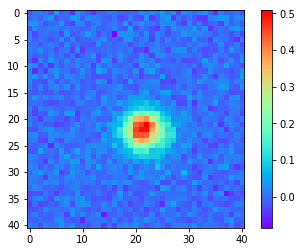

In [0]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(images[7], cmap='rainbow')
plt.colorbar()
plt.show()

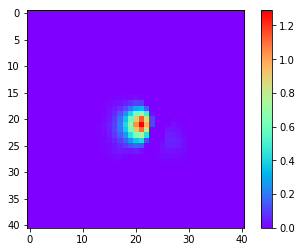

In [0]:
plt.figure()
plt.imshow(condat.x_final[7], cmap='rainbow')
plt.colorbar()
plt.show()